## import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
testid = testset["id"]
x = dataset.drop(dataset.columns[0:2], axis=1)
y = dataset.iloc[:, 1].values
z = testset.drop(testset.columns[0], axis=1)

## correlation matrix

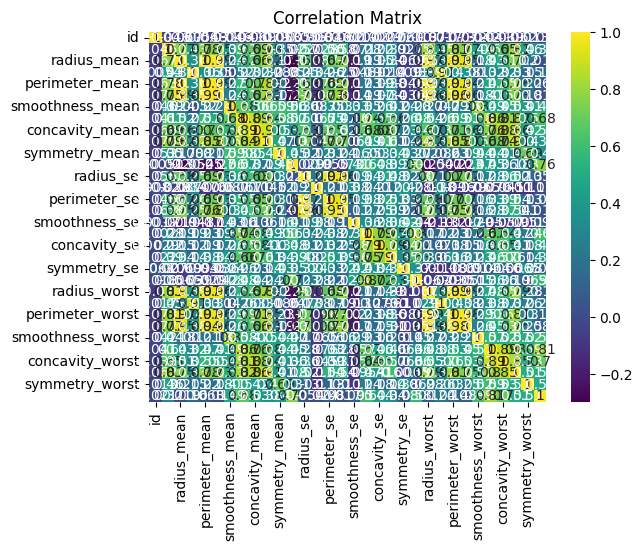

In [12]:
import seaborn as sns

df = dataset.copy()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


correlation_matrix = df.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## normalisation

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
y = le.fit_transform(y)

## delete unecessary columns

In [14]:
columns_to_drop = ['id', 'diagnosis', 'fractal_dimension_mean', 'texture_se', 'symmetry_se',
                   'fractal_dimension_se', 'concavity_mean', 'symmetry_mean', 'compactness_se']
columns_to_drop1 = ['id', 'fractal_dimension_mean', 'texture_se', 'symmetry_se',
                    'fractal_dimension_se', 'concavity_mean', 'symmetry_mean', 'compactness_se']


x = dataset.drop(columns=columns_to_drop, axis=1)
z = testset.drop(columns=columns_to_drop1, axis=1)


## scaling

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
z = sc.transform(z)

## model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression()


cv_scores = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')


print("Cross-validation Accuracy for each fold:", cv_scores)


print("Mean Cross-validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Cross-validation Accuracy:", np.std(cv_scores))


logistic_model.fit(x, y)

test_predictions = logistic_model.predict(z)


submission = pd.DataFrame({"id": testid.tolist(), "diagnosis": test_predictions})
submission = submission.replace({1: "M", 0: "B"})
submission.to_csv('submission.csv', index=False)

Cross-validation Accuracy for each fold: [1.     0.9875 0.975  0.975  1.    ]
Mean Cross-validation Accuracy: 0.9875
Standard Deviation of Cross-validation Accuracy: 0.011180339887498959
